In [1]:
!ls


120-million-word-spanish-corpus.zip Untitled.ipynb


In [2]:
!unzip 120-million-word-spanish-corpus.zip

Archive:  120-million-word-spanish-corpus.zip
  inflating: spanish_corpus/spanishText_10000_15000  
  inflating: spanish_corpus/spanishText_110000_115000  
  inflating: spanish_corpus/spanishText_120000_125000  
  inflating: spanish_corpus/spanishText_15000_20000  
  inflating: spanish_corpus/spanishText_180000_185000  
  inflating: spanish_corpus/spanishText_185000_190000  
  inflating: spanish_corpus/spanishText_200000_205000  
  inflating: spanish_corpus/spanishText_20000_25000  
  inflating: spanish_corpus/spanishText_205000_210000  
  inflating: spanish_corpus/spanishText_210000_215000  
  inflating: spanish_corpus/spanishText_225000_230000  
  inflating: spanish_corpus/spanishText_230000_235000  
  inflating: spanish_corpus/spanishText_25000_30000  
  inflating: spanish_corpus/spanishText_260000_265000  
  inflating: spanish_corpus/spanishText_265000_270000  
  inflating: spanish_corpus/spanishText_270000_275000  
  inflating: spanish_corpus/spanishText_285000_290000  
  inflatin

In [8]:
!head spanish_corpus/spanishText_120000_125000

<doc id="391569" title="Laguna de Paca" nonfiltered="1" processed="1" dbindex="120000">
La Laguna de Paca es una laguna que se encuentra muy cerca de la ciudad de Jauja, Per�, lugar preferido de paseo para los jaujinos y muy visitada por gente de todo el Valle del Mantaro.

Esta laguna se sit�a a 3,418 m.s.n.m. entre los distritos de Paca, Chun�n y Panc�n a 2.5 km al Norte de la ciudad de Jauja. Su espejo de agua es de 21.40 km2 y tiene una capacidad de 85.50 mil m3, los totorales de la laguna sirven de h�bitat a gran variedad de aves silvestres. Es la zona tur�stica m�s visitada del Valle del Mantaro. Su enorme espejo de agua cuenta con hoteles y restaurantes, y durante los fines de semana se llenan de visitantes para pasear por sus aguas o para saborear una deliciosa pachamanca o un plato de trucha frita.

Hermosa laguna de aguas tranquilas sobre las que se han tejido algunas leyendas. Una de ellas cuenta que en su fondo yacen llamas con cargamentos de oro y plata que fueron lanzadas

In [9]:
!grep 'doc>' spanish_corpus/spanishText_10000_15000 | wc -l

    4834


In [45]:
def read_lines(f):
    return open(f, encoding='ISO-8859-1').read().splitlines()

def filter_lines(lines):
    for line in lines:
        if line.startswith('<doc'):
            continue
        if line.startswith('</doc'):
            continue
        if line.startswith('ENDOFARTICLE'):
            continue
        line = line.strip()
        if not line:
            continue
        yield line

def fix_text(text):
    to_replace= ',.!()0123456789;:-/?%$"'
    for c in to_replace:
        text = text.replace(c, ' ')
    return text.lower()
        
def get_words(lines):
    for line in lines:
        line = fix_text(line)
        for word in line.split():
            yield word

            
def all_words():
    files = !find . | grep spanishText
    for f in files:
        lines = read_file(f)
        filtered_lines = filter_lines(lines)
        words = get_words(filtered_lines)
        yield from words



In [46]:
%%time
import collections
counter = collections.Counter(all_words())

CPU times: user 1min 29s, sys: 1.35 s, total: 1min 30s
Wall time: 1min 36s


In [47]:
len(counter)

1387602

In [49]:
most_common = counter.most_common(1387602)

In [52]:
most_common[:1000]

[('de', 7768066),
 ('la', 4042357),
 ('en', 3389607),
 ('el', 3047402),
 ('y', 2648361),
 ('a', 1817983),
 ('que', 1681980),
 ('los', 1449332),
 ('del', 1390869),
 ('se', 1162234),
 ('un', 976537),
 ('por', 961098),
 ('con', 902094),
 ('las', 884812),
 ('una', 844113),
 ('su', 793043),
 ('es', 731708),
 ('al', 564421),
 ('como', 562434),
 ('para', 551743),
 ('fue', 403657),
 ('no', 335792),
 ('más', 333536),
 ('o', 299617),
 ('sus', 270337),
 ('lo', 247800),
 ('también', 226993),
 ('entre', 202480),
 ('este', 177778),
 ('the', 165971),
 ('son', 164073),
 ('esta', 152213),
 ('pero', 150506),
 ('años', 150024),
 ('sobre', 145857),
 ('le', 145009),
 ('dos', 144100),
 ('ha', 137724),
 ('desde', 137045),
 ('hasta', 131289),
 ('ser', 127171),
 ('enlaces', 126139),
 ('parte', 123816),
 ('ciudad', 123539),
 ('durante', 122820),
 ('externos', 122385),
 ('donde', 118051),
 ('año', 115611),
 ('sin', 113965),
 ('era', 112372),
 ('cuando', 109074),
 ('of', 107000),
 ('e', 105607),
 ('está', 100978)

In [53]:
! ls

120-million-word-spanish-corpus.zip oral-utf8.zip
Untitled.ipynb                      spanish_corpus


In [54]:
!unzip oral-utf8.zip

Archive:  oral-utf8.zip
   creating: CORLEC_TXT_FINAL/
  inflating: CORLEC_TXT_FINAL/.DS_Store  
   creating: CORLEC_TXT_FINAL/ADM/
  inflating: CORLEC_TXT_FINAL/ADM/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/CORLEC_TXT_FINAL/
   creating: __MACOSX/CORLEC_TXT_FINAL/ADM/
  inflating: __MACOSX/CORLEC_TXT_FINAL/ADM/._.DS_Store  
  inflating: CORLEC_TXT_FINAL/ADM/CADM035A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/CADM038A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM003A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM004A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM005A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM005B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM005C-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM005D-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM005F-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM005G-corregido.txt  
  inflating: CORLEC_TXT_FINAL/ADM/EADM005J-corregido.txt  
  inflati

  inflating: CORLEC_TXT_FINAL/DOC/PDOC005A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/DOC/PDOC013E-corregido.txt  
   creating: CORLEC_TXT_FINAL/EDU/
  inflating: CORLEC_TXT_FINAL/EDU/.DS_Store  
   creating: __MACOSX/CORLEC_TXT_FINAL/EDU/
  inflating: __MACOSX/CORLEC_TXT_FINAL/EDU/._.DS_Store  
  inflating: CORLEC_TXT_FINAL/EDU/AEDU016A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/BEDU036A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/BEDU036B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/BEDU037B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/CEDU020A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/CEDU020B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/CEDU020C-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/CEDU020D-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/CEDU020E-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/CEDU022A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/CEDU029A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/EDU/CEDU030A-corregid

  inflating: CORLEC_TXT_FINAL/JUR/AJUR004A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/AJUR016A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/AJUR017A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/AJUR017B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/BJUR015A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/EJUR007B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/EJUR011A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR005C-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR005D-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR005E-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR005F-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR005G-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR005H-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR009C-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR014A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR014B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/JUR/PJUR014C-corregido.txt

  inflating: CORLEC_TXT_FINAL/PUB/CPUB001A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/CPUB001B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/CPUB002A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/CPUB009A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/CPUB009B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/CPUB011A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/CPUB038A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/EPUB016B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/PPUB013C-corregido.txt  
  inflating: CORLEC_TXT_FINAL/PUB/PPUB013F-corregido.txt  
   creating: CORLEC_TXT_FINAL/REL/
  inflating: CORLEC_TXT_FINAL/REL/.DS_Store  
   creating: __MACOSX/CORLEC_TXT_FINAL/REL/
  inflating: __MACOSX/CORLEC_TXT_FINAL/REL/._.DS_Store  
  inflating: CORLEC_TXT_FINAL/REL/AREL007A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/REL/BREL020A-corregido.txt  
  inflating: CORLEC_TXT_FINAL/REL/BREL020B-corregido.txt  
  inflating: CORLEC_TXT_FINAL/REL/BREL020C-corregid

In [55]:
! head CORLEC_TXT_FINAL/ADM/CADM035A-corregido.txt

#archivo: cadm035a
#fecha de grabación: 20-9-91
#fuente: conversación en una Delegación Provincial
#localización: Segovia
#términos: certificado
#H1: varón, 50 años. Funcionario
#H2: varón, 50 años.
H1: Certificado del centro donde cursa los estudios...
H2: Ya.
H1: Cayetano. Eh... si anda muy apremiado lo único que puedemos... le puedo... admitir son las matrículas del curso 90 91. Curso... curso del año pasado que termina [ininteligible] en setiembre de este año. [silencio]


Populating the interactive namespace from numpy and matplotlib


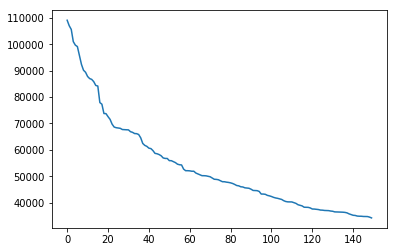

In [60]:
%pylab inline
plot([j for i,j in most_common[50:200]])

In [96]:
most_common[:500]

[('de', 7768066),
 ('la', 4042357),
 ('en', 3389607),
 ('el', 3047402),
 ('y', 2648361),
 ('a', 1817983),
 ('que', 1681980),
 ('los', 1449332),
 ('del', 1390869),
 ('se', 1162234),
 ('un', 976537),
 ('por', 961098),
 ('con', 902094),
 ('las', 884812),
 ('una', 844113),
 ('su', 793043),
 ('es', 731708),
 ('al', 564421),
 ('como', 562434),
 ('para', 551743),
 ('fue', 403657),
 ('no', 335792),
 ('más', 333536),
 ('o', 299617),
 ('sus', 270337),
 ('lo', 247800),
 ('también', 226993),
 ('entre', 202480),
 ('este', 177778),
 ('the', 165971),
 ('son', 164073),
 ('esta', 152213),
 ('pero', 150506),
 ('años', 150024),
 ('sobre', 145857),
 ('le', 145009),
 ('dos', 144100),
 ('ha', 137724),
 ('desde', 137045),
 ('hasta', 131289),
 ('ser', 127171),
 ('enlaces', 126139),
 ('parte', 123816),
 ('ciudad', 123539),
 ('durante', 122820),
 ('externos', 122385),
 ('donde', 118051),
 ('año', 115611),
 ('sin', 113965),
 ('era', 112372),
 ('cuando', 109074),
 ('of', 107000),
 ('e', 105607),
 ('está', 100978)

In [97]:
import pandas

In [99]:
df = pandas.DataFrame(most_common, columns = 'word freq'.split())

In [100]:
df.head()

,word,freq
0,de,7768066
1,la,4042357
2,en,3389607
3,el,3047402
4,y,2648361


(0, 1000)

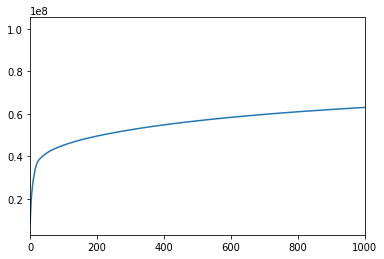

In [106]:
df.freq.cumsum().plot()
xlim(0,1000)

In [107]:
3000/50

60.0